In [1]:
import sys

!{sys.executable} -m pip install --upgrade pip 
!{sys.executable} -m pip install watermark

try:
    from SPARQLWrapper import SPARQLWrapper, JSON
except ImportError:
    !{sys.executable} -m pip install sparqlwrapper
    from SPARQLWrapper import SPARQLWrapper, JSON

try:
    import pandas as pd
except ImportError:
    !{sys.executable} -m pip install pandas
    import pandas as pd
    
import matplotlib.pyplot as plt

import py4cytoscape as p4c
p4c.cytoscape_ping()

import os
print('Get current working directory : ', os.getcwd())

from IPython.display import Image


#from IPython.display import display
pd.set_option('display.max_colwidth', -1)

DEPRECATION: jwt 1.0.0 has a non-standard dependency specifier cryptography<3.*,>=2.2.2. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of jwt or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pandas 0.24.2 has a non-standard dependency specifier pytz>=2011k. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pandas or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: jwt 1.0.0 has a non-standard dependency specifier cryptography<3.*,>=2.2.2. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of jwt or contact the author to suggest that they release a version with a conform

In [2]:

df = pd.read_csv('AOP-Wiki_AO_classification.tsv', sep='\t')

In [3]:
df.head(10)

,AOP,AOPName,ao,aotitle,organ
0,https://identifiers.org/aop/1,Uncharacterized liver damage leading to hepatocellular carcinoma,https://identifiers.org/aop.events/334,"Promotion, Hepatocelluar carcinoma",Liver
1,https://identifiers.org/aop/10,Binding to the picrotoxin site of ionotropic GABA receptors leading to epileptic seizures in adult brain,https://identifiers.org/aop.events/613,"Occurrence, Epileptic seizure",Brain
2,https://identifiers.org/aop/100,Cyclooxygenase inhibition leading to reproductive dysfunction via inhibition of female spawning behavior,https://identifiers.org/aop.events/360,"Decrease, Population growth rate",Other
3,https://identifiers.org/aop/101,Cyclooxygenase inhibition leading to reproductive dysfunction via inhibition of pheromone release,https://identifiers.org/aop.events/360,"Decrease, Population growth rate",Other
4,https://identifiers.org/aop/102,Cyclooxygenase inhibition leading to reproductive dysfunction via interference with meiotic prophase I /metaphase I transition,https://identifiers.org/aop.events/360,"Decrease, Population growth rate",Other
5,https://identifiers.org/aop/103,Cyclooxygenase inhibition leading to reproductive dysfunction via interference with spindle assembly checkpoint,https://identifiers.org/aop.events/360,"Decrease, Population growth rate",Other
6,https://identifiers.org/aop/104,Altered ion channel activity leading impaired heart function,https://identifiers.org/aop.events/351,Increased Mortality,Other
7,https://identifiers.org/aop/105,Alpha2u-microglobulin cytotoxicity leading to renal tubular adenomas and carcinomas (in male rat),https://identifiers.org/aop.events/713,"Increase, Adenomas/carcinomas (renal tubular)",Kidney
8,https://identifiers.org/aop/106,Chemical binding to tubulin in oocytes leading to aneuploid offspring,https://identifiers.org/aop.events/728,"Increase, Aneuploid offspring",Other
9,https://identifiers.org/aop/107,Constitutive androstane receptor activation leading to hepatocellular adenomas and carcinomas in the mouse and the rat,https://identifiers.org/aop.events/719,"Increase, hepatocellular adenomas and carcinomas",Liver


In [4]:
organdict = {}
for index, row in df.iterrows(): 
    if not row[4] in organdict:
        organdict[row[4]] = set()
    organdict[row[4]].add(row[0])


In [5]:
del(organdict['Other'])

In [6]:
for item in organdict:
    print(item,': ',len(organdict[item]))


Liver :  31
Brain :  39
Kidney :  16
Lung :  22


In [7]:
AOPWikiSPARQL = SPARQLWrapper("https://aopwiki.rdf.bigcat-bioinformatics.org/sparql/")
AOPWikiSPARQL.setReturnFormat(JSON) 

In [11]:
def update_bar_chart(value, chart_data,organ):
    if value in chart_data:
        chart_data[value] += 1
    else:
        chart_data[value] = 1
    
    plt.bar(chart_data.keys(), chart_data.values())
    plt.xlabel('Number')
    plt.ylabel('Frequency')
    plt.xlim(0, 30)
    plt.title('Bar Chart of Frequency - ' + str(organ))
    
def show_image_in_notebook(filename):
    p4c.export_image(filename)
    p4c.sandbox_get_from(filename)
    return Image(filename)



In [12]:
%matplotlib inline

Liver
The AOP  https://identifiers.org/aop/60  has 15 KERs
The AOP  https://identifiers.org/aop/401  has 0 KERs
The AOP  https://identifiers.org/aop/61  has 9 KERs
The AOP  https://identifiers.org/aop/41  has 7 KERs
The AOP  https://identifiers.org/aop/1  has 3 KERs
The AOP  https://identifiers.org/aop/213  has 5 KERs
The AOP  https://identifiers.org/aop/108  has 5 KERs
The AOP  https://identifiers.org/aop/37  has 7 KERs
The AOP  https://identifiers.org/aop/383  has 5 KERs
The AOP  https://identifiers.org/aop/57  has 17 KERs
The AOP  https://identifiers.org/aop/107  has 4 KERs
The AOP  https://identifiers.org/aop/36  has 7 KERs
The AOP  https://identifiers.org/aop/46  has 8 KERs
The AOP  https://identifiers.org/aop/144  has 8 KERs
The AOP  https://identifiers.org/aop/58  has 24 KERs
The AOP  https://identifiers.org/aop/118  has 3 KERs
The AOP  https://identifiers.org/aop/130  has 25 KERs
The AOP  https://identifiers.org/aop/278  has 7 KERs
The AOP  https://identifiers.org/aop/362  has 

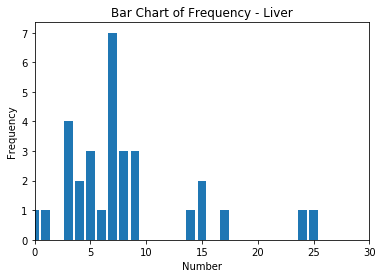

Number of KERs for AOP network of Liver: 233
Applying default style...
Applying preferred layout
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
This file already exists. A Cytoscape popup will be generated to confirm overwrite.
Brain
The AOP  https://identifiers.org/aop/42  has 12 KERs
The AOP  https://identifiers.org/aop/134  has 9 KERs
The AOP  https://identifiers.org/aop/236  has 4 KERs
The AOP  https://identifiers.org/aop/281  has 11 KERs
The AOP  https://identifiers.org/aop/475  has 8 KERs
The AOP  https://identifiers.org/aop/54  has 15 KERs
The AOP  https://identifiers.org/aop/113  has 5 KERs
The AOP  https://identifiers.org/aop/215  has 14 KERs
The AOP  https://identifiers.org/aop/374  has 4 KERs
The AOP  https://identifiers.org/aop/405  has 5 KERs
The AO

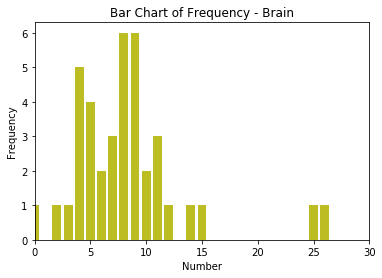

Number of KERs for AOP network of Brain: 239
Applying default style...
Applying preferred layout
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
This file already exists. A Cytoscape popup will be generated to confirm overwrite.
Kidney
The AOP  https://identifiers.org/aop/256  has 4 KERs
The AOP  https://identifiers.org/aop/186  has 6 KERs
The AOP  https://identifiers.org/aop/105  has 5 KERs
The AOP  https://identifiers.org/aop/437  has 4 KERs
The AOP  https://identifiers.org/aop/257  has 4 KERs
The AOP  https://identifiers.org/aop/384  has 5 KERs
The AOP  https://identifiers.org/aop/413  has 5 KERs
The AOP  https://identifiers.org/aop/284  has 0 KERs
The AOP  https://identifiers.org/aop/128  has 24 KERs
The AOP  https://identifiers.org/aop/33  has 2 KERs
The AOP

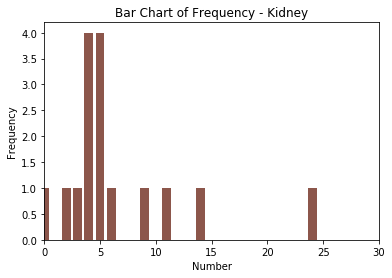

Number of KERs for AOP network of Kidney: 89
Applying default style...
Applying preferred layout
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
This file already exists. A Cytoscape popup will be generated to confirm overwrite.
Lung
The AOP  https://identifiers.org/aop/206  has 5 KERs
The AOP  https://identifiers.org/aop/411  has 3 KERs
The AOP  https://identifiers.org/aop/148  has 4 KERs
The AOP  https://identifiers.org/aop/302  has 9 KERs
The AOP  https://identifiers.org/aop/303  has 6 KERs
The AOP  https://identifiers.org/aop/280  has 7 KERs
The AOP  https://identifiers.org/aop/196  has 10 KERs
The AOP  https://identifiers.org/aop/109  has 4 KERs
The AOP  https://identifiers.org/aop/409  has 8 KERs
The AOP  https://identifiers.org/aop/319  has 7 KERs
The AOP 

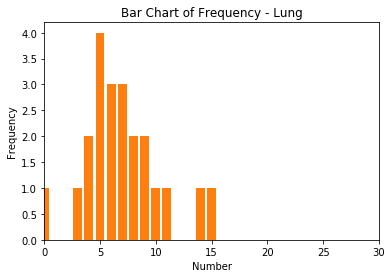

Number of KERs for AOP network of Lung: 136
Applying default style...
Applying preferred layout
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
This file already exists. A Cytoscape popup will be generated to confirm overwrite.


In [17]:
kertable = pd.DataFrame(columns=['KEup','KEdown'])

for item in organdict:
    nKE = {}
    chart_data = {}
    colorKE = {}
    print(item)
    kertable = pd.DataFrame(columns=['KEup','KEdown'])
    for AOP in organdict[item]:
        sparqlquery = '''select distinct ?KER ?KEup ?KEdown where {<'''+AOP+'''> a aopo:AdverseOutcomePathway ; aopo:has_key_event_relationship ?KER. ?KER aopo:has_upstream_key_event ?KEupid ; aopo:has_downstream_key_event ?KEdownid. ?KEupid dc:title ?KEup. ?KEdownid dc:title ?KEdown.}'''
        AOPWikiSPARQL.setQuery(sparqlquery)
        results = AOPWikiSPARQL.query().convert()
        x = []
        KEs = set()
        KEups = []
        KEdowns = []
        for result in results["results"]["bindings"]:
            x.append(result["KER"]["value"])
            kertable = kertable.append({
                'KEup': result["KEup"]["value"],
                'KEdown': result["KEdown"]["value"]
            }, ignore_index=True)
            
            KEs.add(result["KEup"]["value"])
            KEs.add(result["KEdown"]["value"])
            
            KEups.append(result["KEup"]["value"])
            KEdowns.append(result["KEdown"]["value"])
        for KEup in KEups:
            if KEup not in KEdowns:
                colorKE[KEup] = 'M'
            elif not KEup in colorKE:
                colorKE[KEup] = 'K'
            else:
                if not colorKE[KEup] == 'A' or 'M':
                    colorKE[KEup] = 'K'
        for KEdown in KEdowns:
            if KEdown not in KEups:
                colorKE[KEdown] = 'A'
            else:
                pass
                
        update_bar_chart(len(x),chart_data,item)
        print("The AOP ",AOP," has " + str(len(x)) + " KERs")
        for KE in KEs:
            if not KE in nKE:
                nKE[KE]=1
            else:
                nKE[KE]+=1
    
    # Create dictionary for size (corresponding with amount of times present in AOP-Wiki)
    for KE in nKE:
        nKE[KE]=(40+(10*nKE[KE]))
    
    # Create dataframe for size
    dfnKE = pd.DataFrame.from_dict(nKE, orient='index', columns=['Count'])
    
    # Create dataframe for color
    dfcolorKE = pd.DataFrame.from_dict(colorKE, orient='index', columns=['Color'])
    plt.savefig(str(item)+'-KEfreqplot.png')
    plt.show()
    
    kertable = kertable.drop_duplicates()
    print("Number of KERs for AOP network of " + item + ": "+str(len(kertable)))
    kertable.to_csv("output/"+item+'_KERs.csv', index=False)
    
    # Create nodes dataframe
    nodes = pd.DataFrame(data={'id': pd.concat([kertable['KEup'], kertable['KEdown']]).unique(), 'group': 'A', 'score': 20})

    # Create edges dataframe
    edges = pd.DataFrame(data={'source': kertable['KEup'], 'target': kertable['KEdown'], 'interaction': 'interacts', 'weight': 1 })
    
    # Create network
    p4c.create_network_from_data_frames(nodes, edges, title=item, collection="AOP Networks")
    
    # Assign count values as node attributes
    p4c.load_table_data(dfnKE)
    
    # Assign color values as node attributes
    p4c.load_table_data(dfcolorKE)
    
    # Map count attribute to node size in Cytoscape
    p4c.set_node_size_mapping('Count', mapping_type='passthrough')
    
    # Map color attribute to node size in Cytoscape
    p4c.set_node_color_mapping('Color', ['M', 'K', 'A'], ['#b6d7a8', '#ffe599', '#ea9999'], 'd')
    
    # Set node shape default
    p4c.set_node_shape_default('RECTANGLE')
    
    # Set arrow shape default
    p4c.set_edge_target_arrow_shape_default('ARROW')
    
    show_image_in_notebook(item+".png")

In [18]:
p4c.cytoscape_version_info()

{'apiVersion': 'v1',
 'cytoscapeVersion': '3.9.1',
 'automationAPIVersion': '1.1.0',
 'py4cytoscapeVersion': '0.0.8'}